In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('C:/Users\icear/Desktop/Kaggle/Titanic/train.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many Survived?
0    549
1    342
Name: Survived, dtype: int64


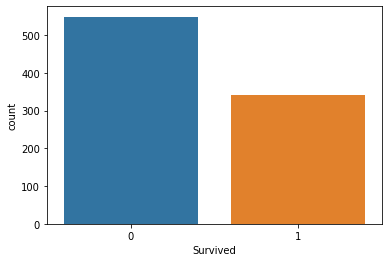

In [6]:
# How many Suvived?
sns.countplot('Survived',data=data)
print('How many Survived?')
print(data['Survived'].value_counts())

        Survived
Sex             
female  0.742038
male    0.188908


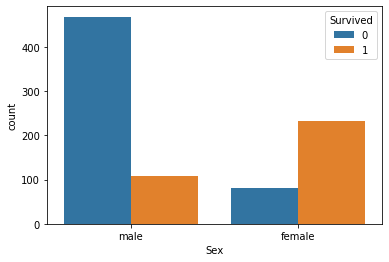

In [7]:
# Sex
sns.countplot('Sex',data=data,hue='Survived')
print(data[['Survived','Sex']].groupby(['Sex']).mean())

Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


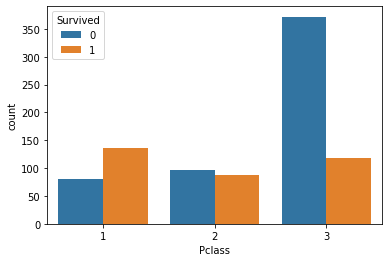

In [8]:
# Pclass
print(pd.crosstab(data['Survived'],data['Pclass'],margins=True))
print(data[['Survived','Pclass']].groupby(['Pclass']).mean())
sns.countplot('Pclass',data=data,hue='Survived')

In [9]:
pd.crosstab([data['Survived'],data['Sex']],data['Pclass'],margins=True)

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891

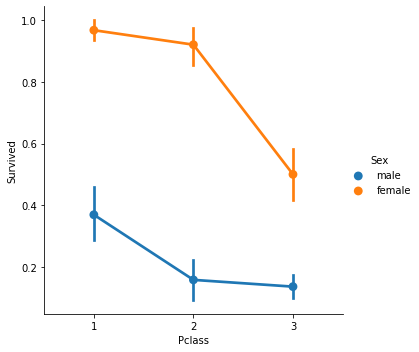

In [10]:
sns.factorplot('Pclass','Survived',data=data,hue='Sex')

In [11]:
# Age
print('max:',data['Age'].max())
print('average',data['Age'].mean())
print('min',data['Age'].min())

max: 80.0
average 29.69911764705882
min 0.42


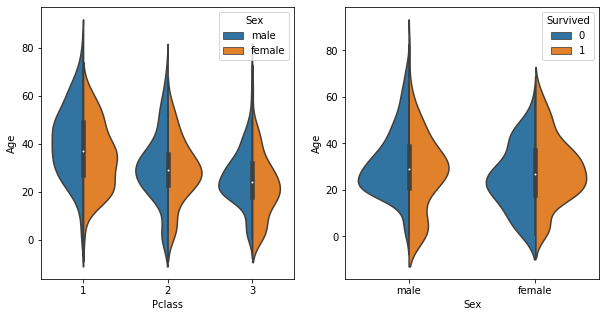

In [12]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.violinplot('Pclass','Age',data=data,hue='Sex',split=True,ax=ax[0])
sns.violinplot('Sex','Age',data=data,hue='Survived',split=True,ax=ax[1])

In [13]:
data['Initial']=0
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data['Initial'],data['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
# filling null Age
data.loc[(data['Age'].isnull())&(data['Initial']=='Mr'),'Age']=33
data.loc[(data['Age'].isnull())&(data['Initial']=='Master'),'Age']=5
data.loc[(data['Age'].isnull())&(data['Initial']=='Miss'),'Age']=22
data.loc[(data['Age'].isnull())&(data['Initial']=='Mrs'),'Age']=36
data.loc[(data['Age'].isnull())&(data['Initial']=='Other'),'Age']=46

In [18]:
data['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Survived=1')

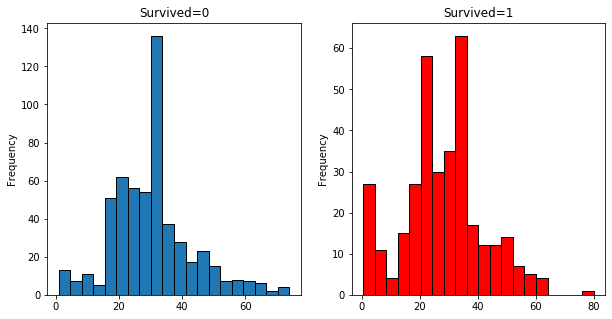

In [19]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data[data['Survived']==0]['Age'].plot.hist(ax=ax[0],bins=20,edgecolor='black')
data[data['Survived']==1]['Age'].plot.hist(ax=ax[1],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
ax[1].set_title('Survived=1')

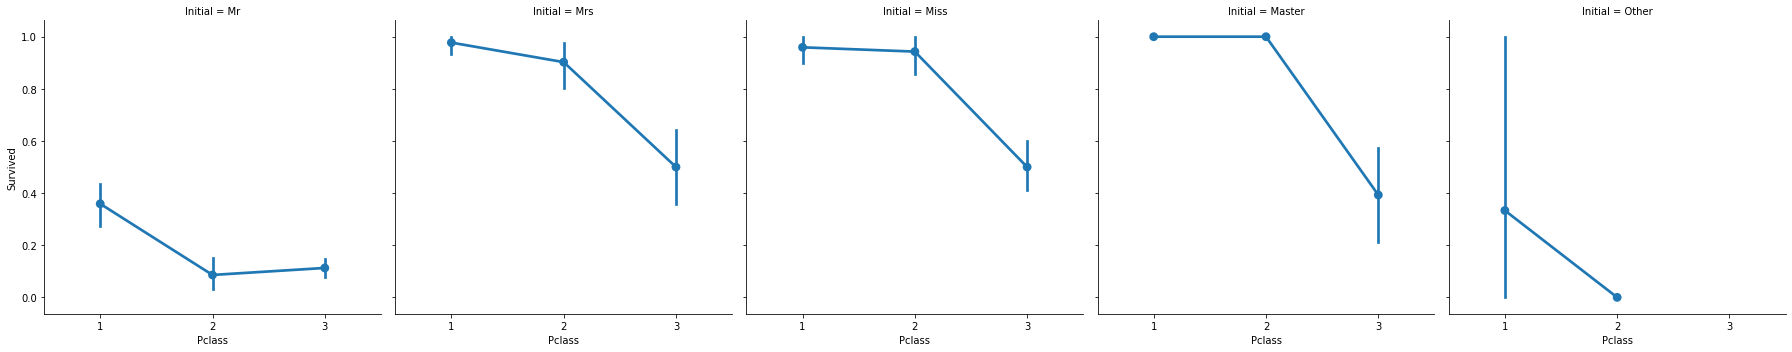

In [20]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)

In [21]:
# Embarked
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

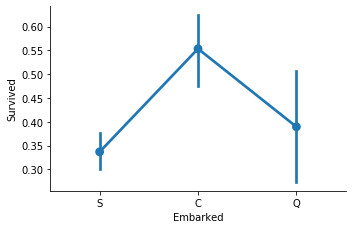

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)

Text(0.5, 1.0, 'Embarked & Survived Count')

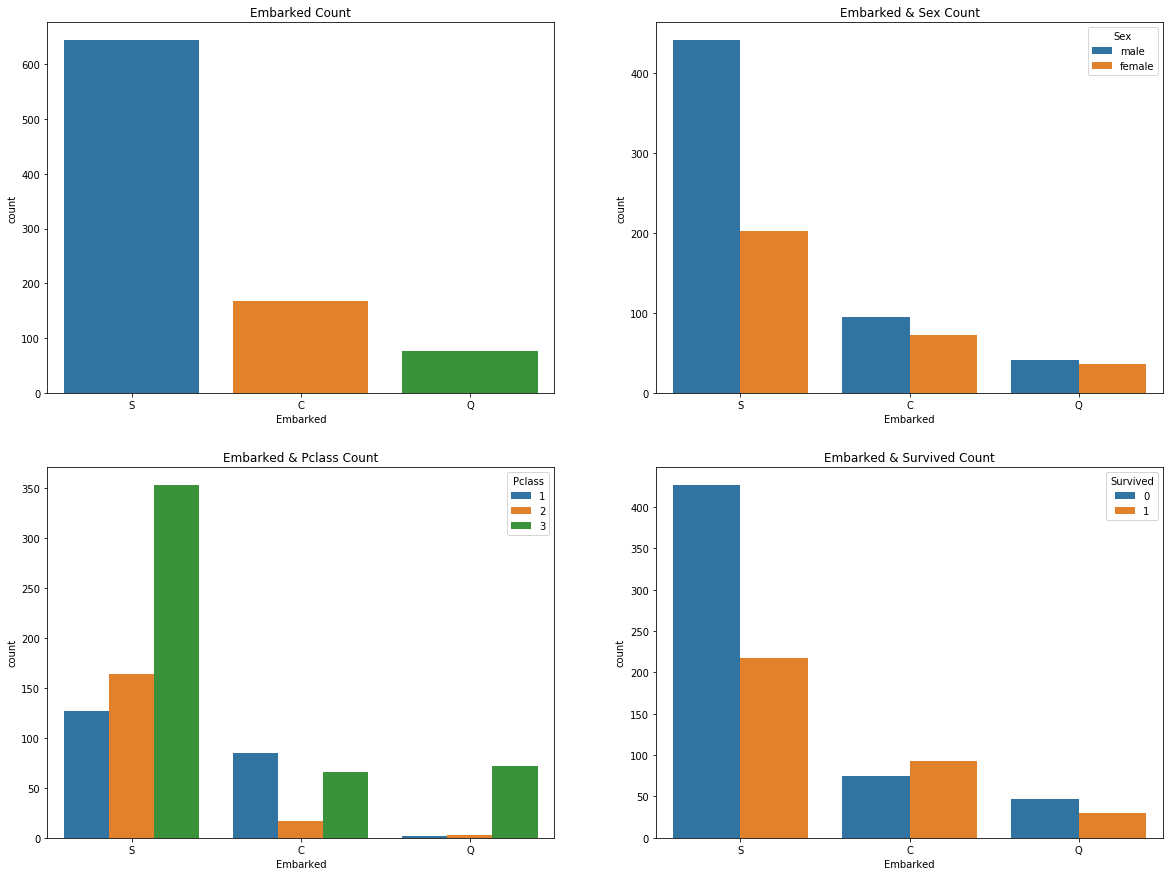

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,0])
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,1])
ax[0,0].set_title('Embarked Count')
ax[0,1].set_title('Embarked & Sex Count')
ax[1,0].set_title('Embarked & Pclass Count')
ax[1,1].set_title('Embarked & Survived Count')

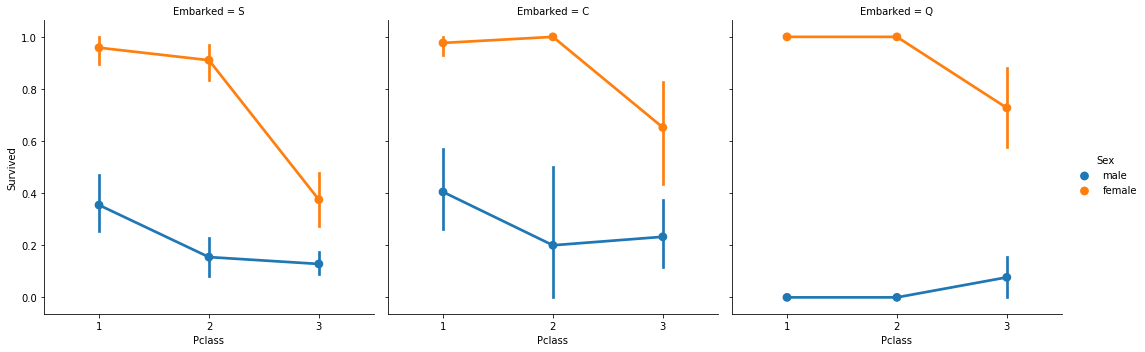

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data,col='Embarked')

In [25]:
# filling Embarked null
data['Embarked'].fillna('S',inplace=True)

In [26]:
data['Embarked'].isnull().sum()

0

In [27]:
# SibSip
pd.crosstab(data['Survived'],data['SibSp']).T

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


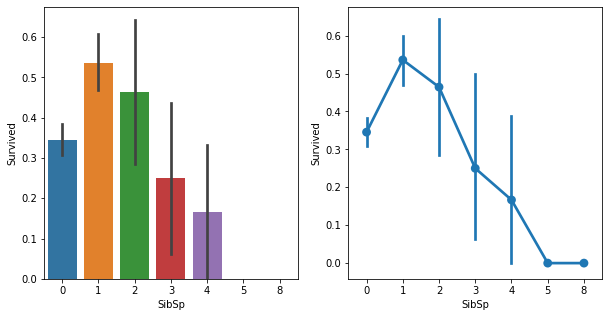

In [28]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
plt.close(2)

In [29]:
pd.crosstab(data['Pclass'],data['SibSp']).T

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [30]:
# Parch
pd.crosstab(data['Parch'],data['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


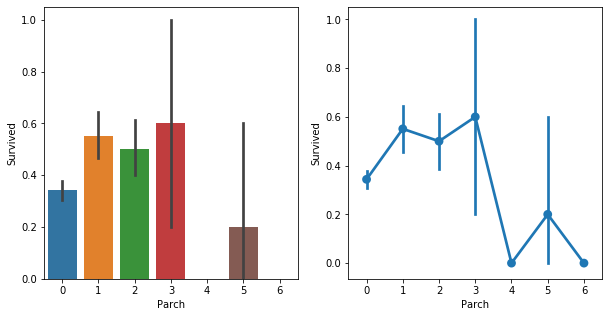

In [31]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
plt.close(2)

In [32]:
# Fare
print('highest fare',data['Fare'].max())
print('lowest fee',data['Fare'].min())
print('average fee',data['Fare'].mean())

highest fare 512.3292
lowest fee 0.0
average fee 32.2042079685746


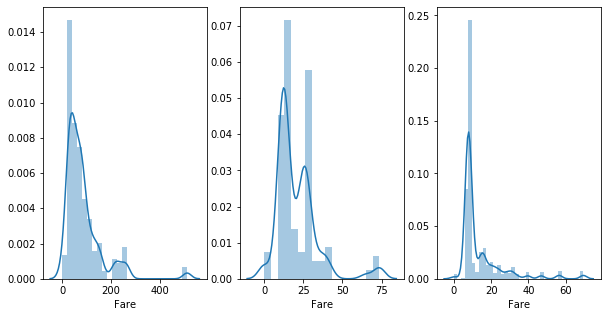

In [33]:
f,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])

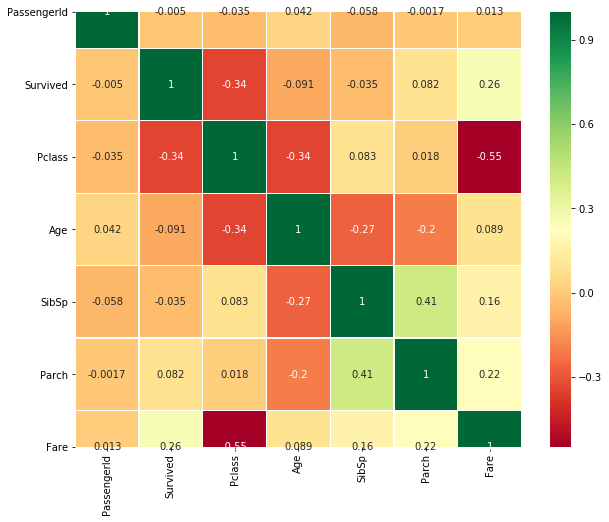

In [34]:
sns.heatmap(data.corr(),annot=True,linewidths=0.2,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [35]:
# age_band
data['Age_band']=0
data.loc[(data['Age']<=16),'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

In [36]:
data['Age_band']

0      1
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    1
889    1
890    1
Name: Age_band, Length: 891, dtype: int64

In [37]:
data['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

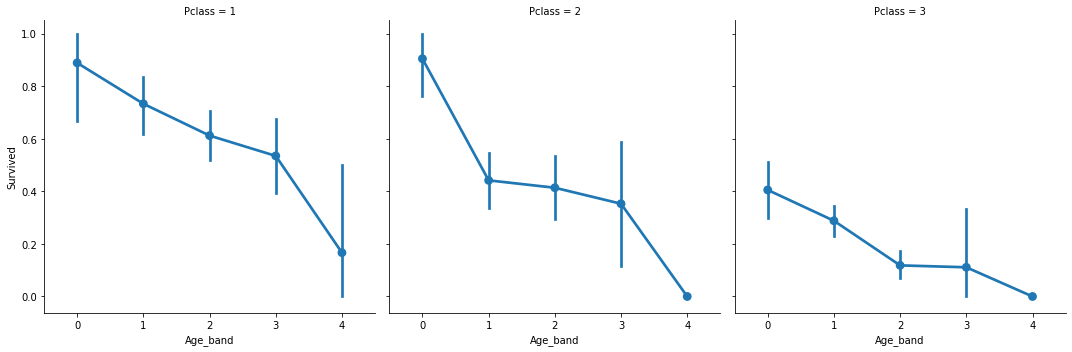

In [38]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')

In [39]:
data['Family_Size']=0
data['Family_Size']=data['SibSp']+data['Parch']
data['Alone']=0
data.loc[data['Family_Size']==0,'Alone']=1

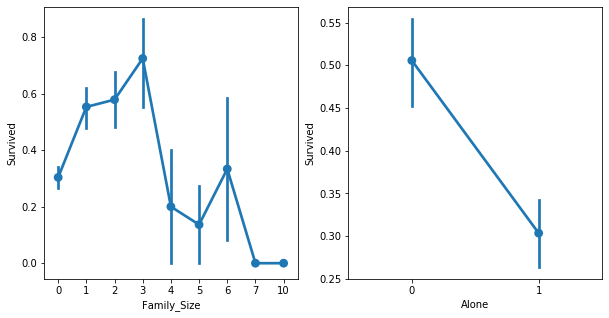

In [40]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
plt.close(2)
plt.close(3)

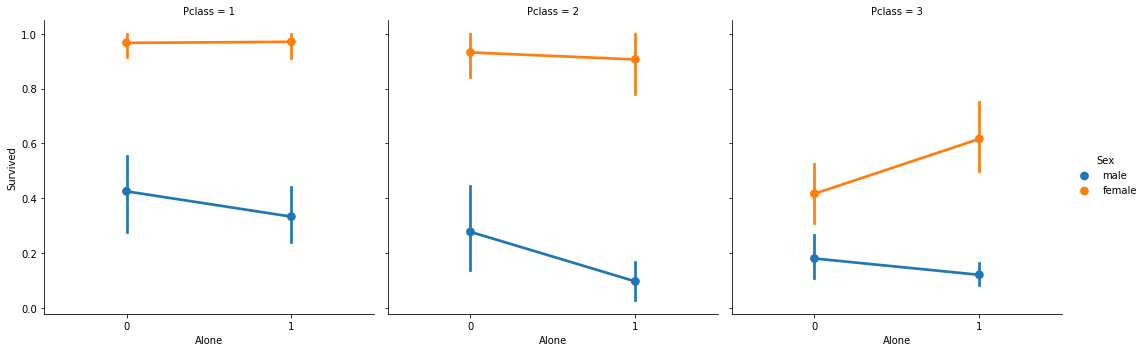

In [41]:
sns.factorplot('Alone','Survived',hue='Sex',col='Pclass',data=data)

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

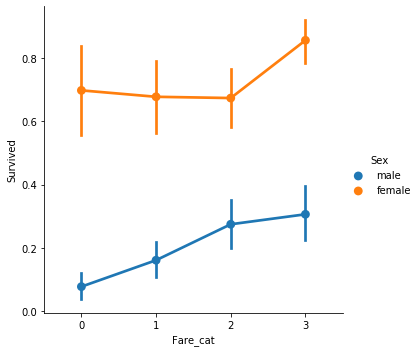

In [44]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

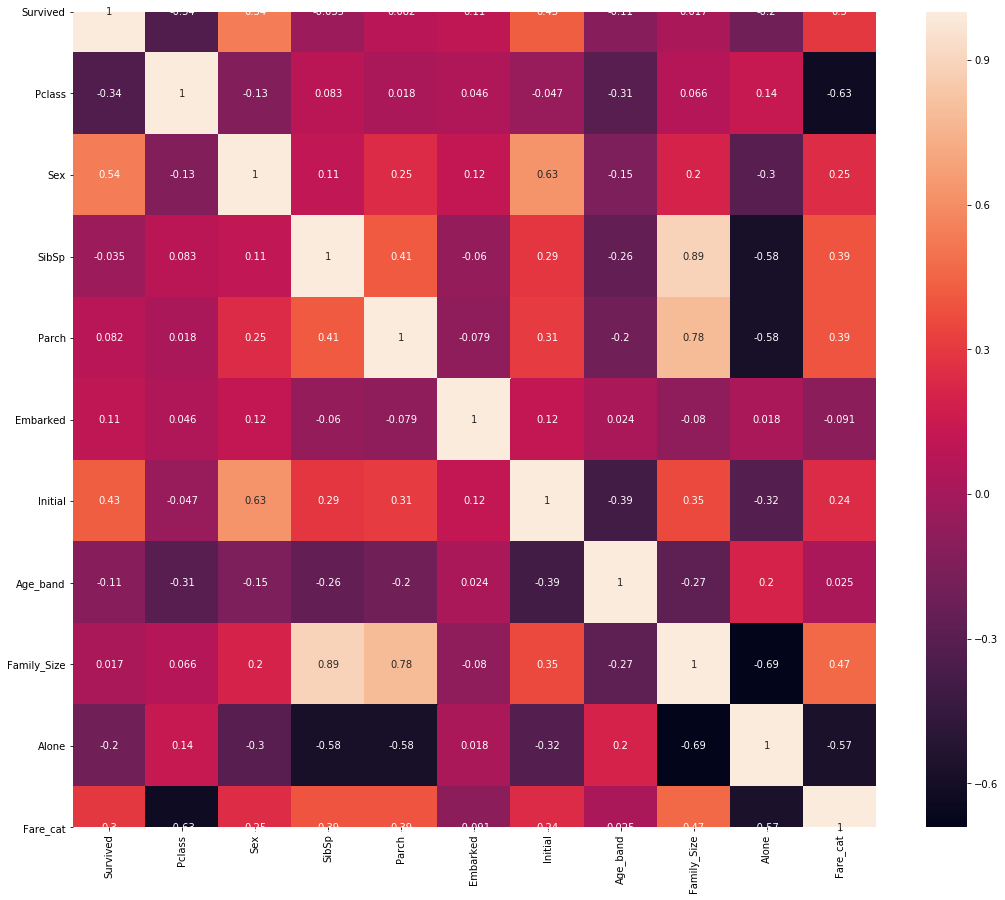

In [47]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(18,15)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

In [50]:
train_X=train[train.columns[1:]]
train_y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_y=test[test.columns[:1]]
X=data[data.columns[1:]]
y=data['Survived']

In [51]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_y)
prediction1=model.predict(test_X)
print('SVM(rbf) :',metrics.accuracy_score(prediction1,test_y))

SVM(rbf) : 0.835820895522388


In [52]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_y)
predition2=model.predict(test_X)
print('SVM(linear) :',metrics.accuracy_score(predition2,test_y))

SVM(linear) : 0.8171641791044776


In [53]:
model=LogisticRegression()
model.fit(train_X,train_y)
prediction3=model.predict(test_X)
print('LogisticRegression :',metrics.accuracy_score(prediction3,test_y))

LogisticRegression : 0.8171641791044776


In [54]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction4=model.predict(test_X)
print('DecisionTree :',metrics.accuracy_score(prediction4,test_y))

DecisionTree : 0.8059701492537313


In [55]:
model=KNeighborsClassifier()
model.fit(train_X,train_y)
prediction5=model.predict(test_X)
print('KNN :',metrics.accuracy_score(prediction5,test_y))

KNN : 0.832089552238806


[0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] 0.835820895522388


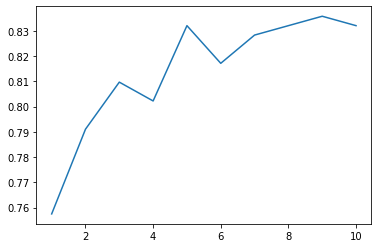

In [56]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index,a)
print(a.values,a.values.max())

In [57]:
model=GaussianNB()
model.fit(train_X,train_y)
predcition6=model.predict(test_X)
print('NB :',metrics.accuracy_score(predcition6,test_y))

NB : 0.8134328358208955


In [58]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction7=model.predict(test_X)
print('RandomForest :',metrics.accuracy_score(prediction7,test_y))

RandomForest : 0.8171641791044776


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold=KFold(n_splits=10,random_state=2)
xyz=[]
acc=[]
std=[]
classifier=['Linear SVM','rbf SVM','Logistic Regression','KNN','DecisionTree','NB','RandomForest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model=i
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring='accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    acc.append(cv_result)
new_models_dataframe2=pd.DataFrame({'cv mean':xyz,'std':std},index=classifier)
new_models_dataframe2

,cv mean,std
Linear SVM,0.783282,0.045736
rbf SVM,0.821787,0.048118
Logistic Regression,0.799386,0.033018
KNN,0.785049,0.058846
DecisionTree,0.789734,0.044841
NB,0.800998,0.031258
RandomForest,0.802535,0.048590


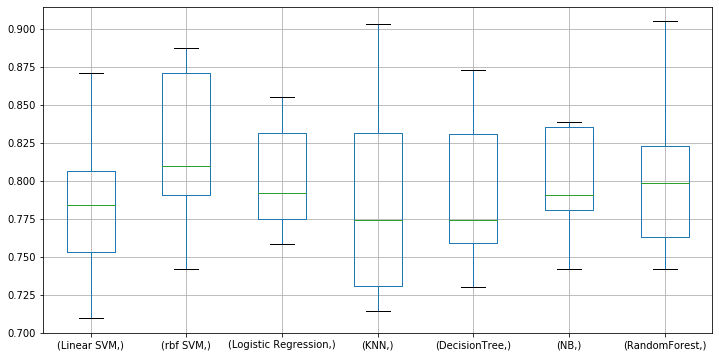

In [60]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(acc,index=[classifier])
box.T.boxplot()

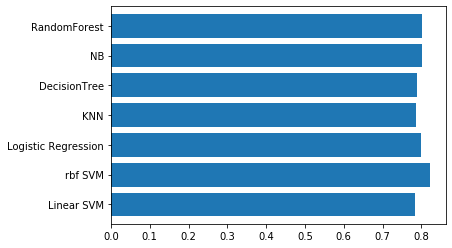

In [61]:
new_models_dataframe2['cv mean'].plot.barh(width=0.8)

Text(0.5, 1, 'NB')

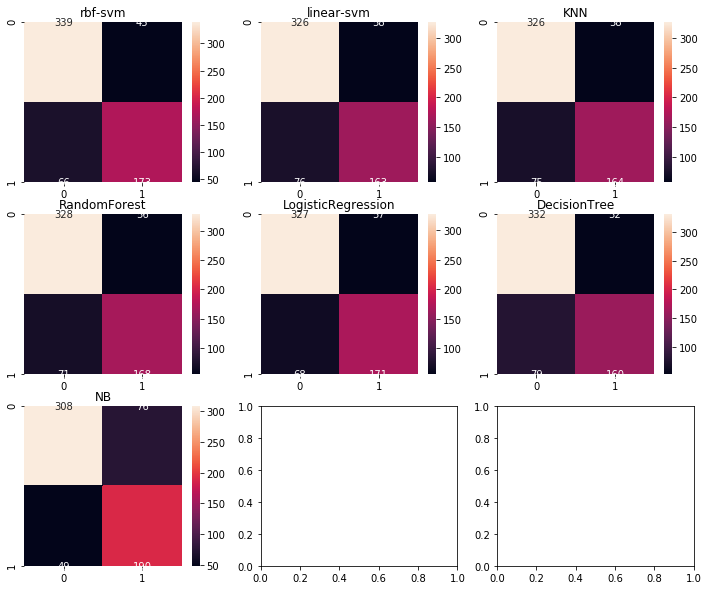

In [62]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[0,0])
ax[0,0].set_title('rbf-svm')
y_pred=cross_val_predict(svm.SVC(kernel='linear'),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[0,1])
ax[0,1].set_title('linear-svm')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[0,2])
ax[0,2].set_title('KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[1,0])
ax[1,0].set_title('RandomForest')
y_pred = cross_val_predict(LogisticRegression(),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[1,1])
ax[1,1].set_title('LogisticRegression')
y_pred = cross_val_predict(DecisionTreeClassifier(),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[1,2])
ax[1,2].set_title('DecisionTree')
y_pred = cross_val_predict(GaussianNB(),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='2.0f',ax=ax[2,0])
ax[2,0].set_title('NB')

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
C=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(train_X,train_y)

Fitting 3 folds for each of 220 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:   15.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                               0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [65]:
print(gd.best_score_)
print(gd.best_estimator_)

0.8218298555377207
SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [66]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(train_X,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   58.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [67]:
print(gd.best_score_)
print(gd.best_estimator_)

0.8089887640449438
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [68]:
from sklearn.ensemble import VotingClassifier

In [69]:
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                             ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                             ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                             ('LR',LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],voting='soft').fit(train_X,train_y)

cross=cross_val_score(ensemble_lin_rbf,train_X,train_y,cv=10,scoring='accuracy')

In [70]:
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_y))
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8090298238103631


In [71]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')


In [72]:
print('bagging KNN :',metrics.accuracy_score(prediction,test_y))
print('test bagging KNN :',result.mean())

bagging KNN : 0.835820895522388
test bagging KNN : 0.8041911141329438


In [73]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')

In [74]:
print('bagging DecisionTree :',metrics.accuracy_score(prediction,test_y))
print('test bagging DecisionTree :',result.mean())

bagging DecisionTree : 0.8246268656716418
test bagging DecisionTree : 0.7929511554313247


In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,train_X,train_y,cv=10,scoring='accuracy')

In [76]:
print('AdaBoost :',result.mean())

AdaBoost : 0.8122044269849663


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,train_X,train_y,cv=10,scoring='accuracy')

In [78]:
print('GradientBoosting :',result.mean())

GradientBoosting : 0.8025773715091535


In [79]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,train_X,train_y,scoring='accuracy')

In [80]:
print('xgboost :',result.mean())

xgboost : 0.7929363309798093


In [81]:
n_estimators=list(range(100,1100,100))
learning_rate=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learning_rate,}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(train_X,train_y)

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed: 13.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                           0.7, 0.8, 0.9, 1],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [82]:
print(gd.best_score_)
print(gd.best_estimator_)

0.826645264847512
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


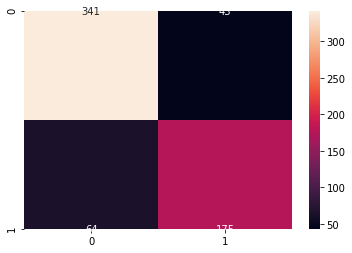

In [83]:
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
result=cross_val_predict(ada,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,result),annot=True,fmt='2.0f')

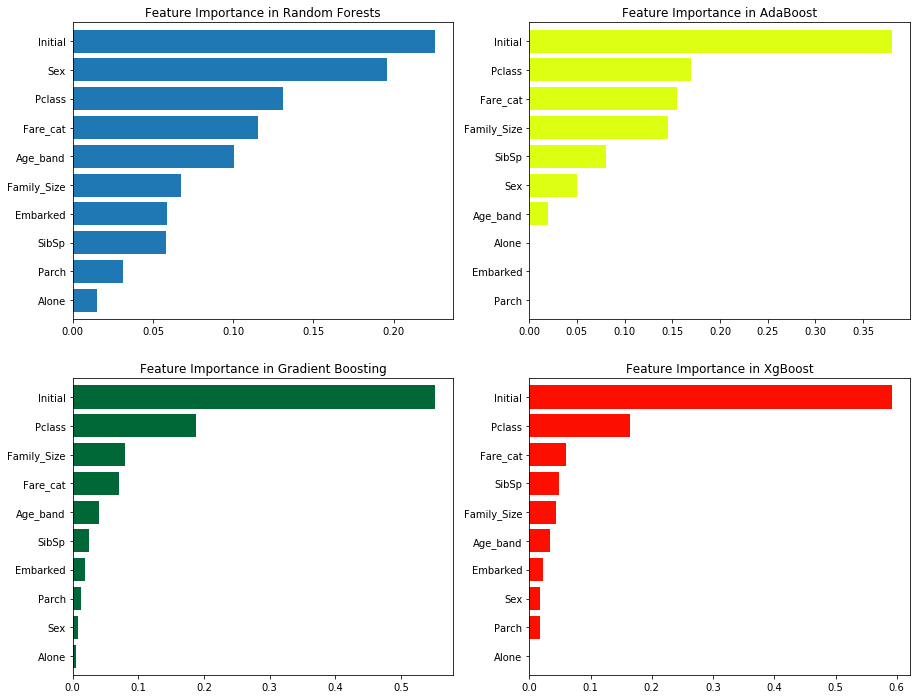

In [85]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()